# Продвинутое машинное обучение

# Домашнее задание № 1
## Жуйков Владимир
### Группа DS-21

## Часть I: О теореме Байеса

1.Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.


Введем обозначения: 

$\rho(A) = 0.01 $ - вероятность редкой группы крови, $\rho(\overline{A}) = 0.99 $ - вероятность не редкой группы крови \
$\rho(B)$ - вероятность того, что подсудимый виновен , $\rho(\overline{B})$ - веротность того, что подсудимый невиновен \
$ \rho (A|\overline{B}) $ - вероятность редкой группы крови,при условии, что человек невиновен 

В первой части прокурор оценил вероятность $ \rho (A|\overline{B}) $. Если n - количество людей в городе велико, то он прав и она ~ 1%. 

Второе утверждение прокурора неверно. Он говорит, что на 99% он виновен. Но скорее всего прокурор имелл ввиду следующую вероятность: $ \rho (\overline{A}|\overline{B}) $ 

Кроме того прокурору необходимо было бы оценить условную вероятность $ \rho (B|A) $

2.Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?

Дано: n = 1000000

В этом случае адвокат применил теорему Байеса и находит условную вероятность виновности при условии, что у подсудимого редкая кровь:
    

In [1]:
n = 1000000
res = ((1 * (1 / n) / (1 * (1 / n) + (0.01 * ((n - 1) / n)))))*100
print("{:.2f}".format(res) + ' %')

0.01 %


Однако, адвокат сделал предположение, что вероятность быть действительно убийцей равновероятна, что не совсем верно. 

Большое количество людей не могла быть убийцей из-за показаний, свидетелей других признаках. Поэтому утверждение вероятности быть виновным 0.01% неверное. Тут адвокат неправ.

Адвокат не правильно оценил априорную вероятность.

3.Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).
Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?


t - результат теста
d - наличие болезни

Вероятность отрицательного результата теста у больного человека:  

$ P(d|\overline{t}) = \frac{P(\overline{t}|d)P(d)}{P(\overline{t}|d)P(d) + P(\overline{t}|\overline{d})P(\overline{d})} $

Вероятность положительного результата теста у здорового человека:

$ P(\overline{d}|t) = \frac{P(t|\overline{d})P(\overline{d})}{P(t|\overline{d})P(\overline{d}) + P(t|d)P(d)} $  


Изменяем величину  ${P(\overline{t}|d)}$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
p_d = 0.01
p_not_d = 1.0 - p_d
p_var = np.arange(0.95, 1.0, 0.01)
p_not_var = 1. - p_var
p_d_not_t = p_not_var * p_d / (p_not_var * p_d + p_var * p_not_d)
p_d_t = p_var * p_d / (p_var * p_d + p_not_var * p_not_d)

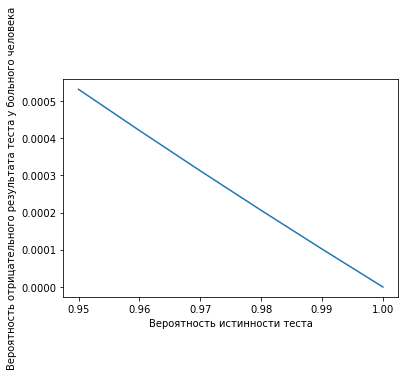

In [4]:
plt.plot(p_var, p_d_not_t)
plt.xlabel("Вероятность истинности теста")
plt.ylabel("Вероятность отрицательного результата теста у больного человека")

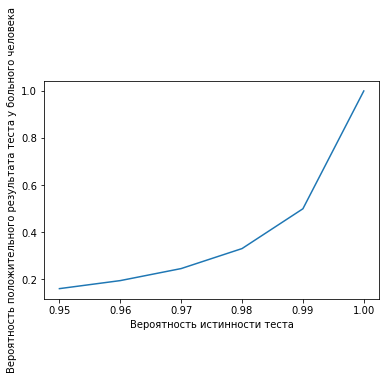

In [5]:
plt.plot(p_var, p_d_t)
plt.xlabel("Вероятность истинности теста")
plt.ylabel("Вероятность положительного результата теста у больного человека")

По верхнему графику видно, что вероятность болеть при отрицательном тесте маленькая, и какие-либо улучшения не сильно поднимут качество теста. 

По нижнему графику видно, что есть потенциал для улучшения. 

Вывод: Я советую сосредоточиться на уменьшении false positives

## Часть II: О линейной регрессии

1.	Скачайте данные в формате csv, выберите из таблицы данные по России, начиная с 3 марта 2020 г. (в этот момент впервые стало больше 2 заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы total_cases и new_cases); для упрощения обработки можно заменить в столбце new_cases все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания). Иначе говоря, мы будем “играть” за российские власти, которые пытаются понять, что делать, глядя на данные об эпидемии в мае 2020 года.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
from sklearn import linear_model
import seaborn as sns
%matplotlib inline

In [7]:
data = pd.read_csv('owid-covid-data.csv', parse_dates=['date'])

In [8]:
data = data[(data.location == 'Russia')&(data.date >= pd.to_datetime('2020-03-03'))].reset_index(drop=True)

In [9]:
data.shape

(384, 59)

In [10]:
data.new_cases = data.new_cases.apply(lambda x: 1 if x == 0 else x)

In [11]:
train = data[:50]
test = data[50:]

2.	Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально. Для первого подхода к снаряду давайте это и используем.

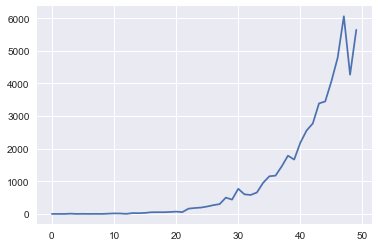

In [12]:
plt.plot(train.new_cases)

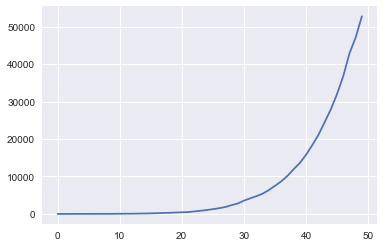

In [13]:
plt.plot(train.total_cases)

a.	Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня.

In [14]:
lin_reg = linear_model.LinearRegression(fit_intercept=True)

In [15]:
x = np.array(range(1, len(train.total_cases) + 1)).reshape(-1, 1)
y = np.log(train.total_cases.values)

In [16]:
lin_reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
y_pred = np.exp(lin_reg.predict(x.reshape(-1, 1)))

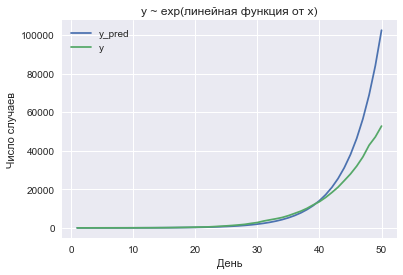

In [18]:
plt.plot(x, y_pred, label="y_pred")
plt.plot(x, np.exp(y), label="y")
plt.legend()
plt.title('y ~ exp(линейная функция от x)')
plt.xlabel('День')
plt.ylabel('Число случаев');

b.	Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).

In [19]:
init_mu = np.array([0, 0])
init_sigma = 30 * np.array([[1, 0], [0, 1]])

def get_posterior(x, y):
    x = np.hstack((np.ones((len(x), 1)), x))

    W = np.linalg.inv(x.T @ x) @ x.T @ y
    y_pred = x @ W
    noise_var = (y - y_pred).var()
    alpha = 1 / noise_var

    sigma = np.linalg.inv(np.linalg.inv(init_sigma) + alpha * x.T @ x)
    mu = sigma @ (np.linalg.inv(init_sigma) @ init_mu + alpha * x.T @ y)
    
    return mu, sigma

In [20]:
mu, sigma = get_posterior(x, y)

In [21]:
mu

array([ 1.62190515,  0.19830697])

In [22]:
lin_reg.intercept_, lin_reg.coef_

(1.6224462364488099, array([ 0.19829091]))

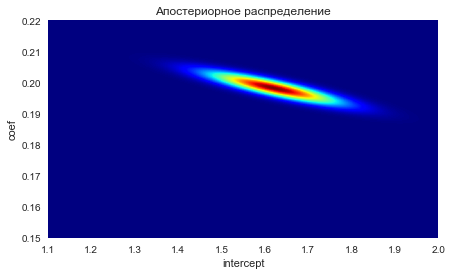

In [23]:
N = 1000

plot_lims = (
    (1.1, 2.0), # intercept
    (0.15, 0.22) # coef
)

X = np.linspace(*plot_lims[0], N)
Y = np.linspace(*plot_lims[1], N)
X, Y = np.meshgrid(X, Y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

Z = multivariate_normal.pdf(pos, mean=mu, cov=sigma)

plt.figure(figsize=(7, 4))
plt.xlim(plot_lims[0])
plt.ylim(plot_lims[1])
plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet, shading='auto')
plt.title('Апостериорное распределение')
plt.xlabel('intercept')
plt.ylabel('coef')
plt.show()

c.	Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая 2020 года? к 1 июня? к 1 сентября? Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).

In [24]:
def sample_statistics(mu, sigma, xs, n=20):
    my_w = np.random.multivariate_normal(mu, sigma, n)
    res = np.zeros((n, xs.shape[0]))
    for i,w in enumerate(my_w):
        res[i,:] = np.exp(w[0] + w[1]*xs)
    return res

In [25]:
palette = sns.color_palette()
def plot_predictions(xs, mu, x):
    fig = plt.figure(figsize=(10,4))
    ax = fig.add_subplot(111)
    ax.set_xlim((xs[0], xs[-1]))
    ax.plot(xs, np.exp(y), label="Правильный ответ")
    ax.plot(xs, np.exp(mu[1]*xs + mu[0]), color="green", label="MAP гипотеза")
    ax.fill_between(xs, np.mean(x, axis=0) - np.std(x, axis=0), np.mean(x, axis=0) + np.std(x, axis=0), color=palette[5], alpha=.2, label="+- дисперсия предсказаний")
    ax.legend(fontsize=10)

In [26]:
samples = sample_statistics(mu, sigma, x.ravel(), n=1000)

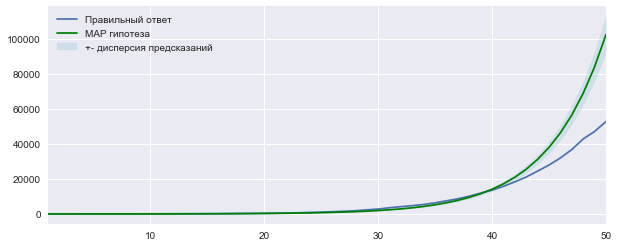

In [27]:
plot_predictions(x.ravel(), mu, samples)

In [28]:
start = pd.to_datetime('2020-03-03')
may = pd.to_datetime('2020-05-01')
june = pd.to_datetime('2020-06-01')
september = pd.to_datetime('2020-09-01')

predictions = [int(value) for value in np.exp(lin_reg.predict(np.array([[(may - start).days], 
                                                                      [(june - start).days],
                                                                      [(september - start).days]])))]

print(f'1 мая в России модель предсказывает {predictions[0]} случаев')
print(f'1 июня в России модель предсказывает {predictions[1]} случаев')
print(f'1 сентября в России модель предсказывает {predictions[2]} случаев')

1 мая в России модель предсказывает 610241 случаев
1 июня в России модель предсказывает 285179209 случаев
1 сентября в России модель предсказывает 23869843564137116 случаев


3.	Предсказания экспоненциальной модели наверняка получились грустными. Но это, конечно, чересчур пессимистично — экспоненциальный рост в природе никак не может продолжаться вечно. Кривая общего числа заболевших во время эпидемии в реальности имеет сигмоидальный вид: после начальной фазы экспоненциального роста неизбежно происходит насыщение. В качестве конкретной формы такой сигмоиды давайте возьмём форму функции распределения для гауссиана :
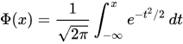

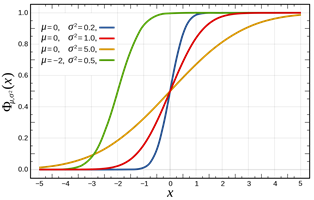

Естественно, в нашем случае сигмоида стремится не к единице, т.е. константа перед интегралом может быть произвольной (и её можно внести в экспоненту), а в экспоненте под интегралом может быть произвольная квадратичная функция от t.

a.	Предложите способ обучать параметры такой сигмоидальной функции при помощи линейной регрессии.

Данную модель можно предскавить в эквивалентном виде:

$y = \int_{-\infty}^{x} e^{w_0 + w_1 t + w_2 t^2} dt,$

Взятие производной и дифференцирование приводит к виду:

$\log(\dfrac{dy}{dx}) = w_0 + w_1 x + w_2 x^2,$

Представление позволит использовать модель линейной регрессии. В данном выражении $y$ - число новых случаев, $x$ - число дней.

In [29]:
x_new = np.column_stack([x, x**2])
y = np.log(train.total_cases.values)

In [30]:
model_sigm = linear_model.LinearRegression(fit_intercept=True)

In [31]:
model_sigm.fit(x_new, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
y_pred_new = model_sigm.predict(x_new)
y_pred_new = np.exp(y_pred_new)
y_pred_new_total = y_pred_new.cumsum()

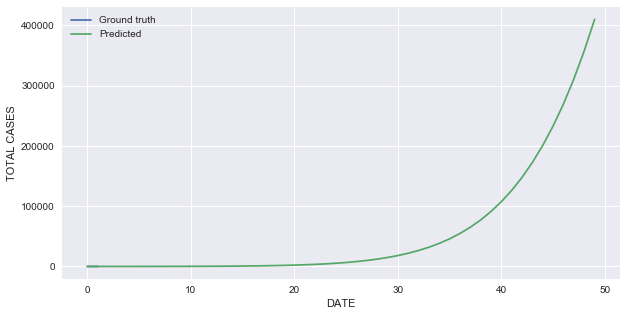

In [33]:
plt.figure(figsize=(10, 5))
plt.plot(x_new[0].cumsum(), label="Ground truth")
plt.plot(y_pred_new_total, label="Predicted")
plt.legend()
plt.xlabel("DATE")
plt.ylabel("TOTAL CASES")

b.	Обучите эти параметры на датасете случаев коронавируса в России. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели.

In [34]:
sigma_noise = np.mean((y - y_pred_new) ** 2)

In [35]:
y_pred_new.shape

(50,)

In [36]:
def bayesian_update(mu, sigma, x, y, sigma_noise):
    sigma_n = np.linalg.inv(np.linalg.inv(sigma) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x), x) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x), y))
    return mu_n, sigma_n

In [37]:
mu, sigma = bayesian_update(np.zeros(2), 10**3 * np.eye(2), x_new, y_pred_new, sigma_noise)

In [38]:
mu

array([  3.03234569e-07,   1.35688569e-05])

In [39]:
sigma

array([[  9.99999999e+02,  -2.73674002e-05],
       [ -2.73674002e-05,   9.99998895e+02]])

c.	Посэмплируйте много разных сигмоид из апостериорного распределения, постройте графики. Сколько, исходя из этих сэмплов, будет всего случаев коронавируса в России? Постройте эмпирическое предсказательное распределение, нарисуйте графики. Каков ваш прогноз числа случаев коронавируса в пессимистичном сценарии (90-й процентиль в выборке числа случаев)? В оптимистичном сценарии (10-й процентиль)?

In [40]:
palette = sns.color_palette()
def plot_predictions_new(xs, mu, x):
    fig = plt.figure(figsize=(10,4))
    ax = fig.add_subplot(111)
    ax.set_xlim((xs[0], xs[-1]))
    ax.plot(xs, np.exp(y), label="Правильный ответ")
    ax.plot(xs, np.exp(mu[1]*xs + mu[0]), color="green", label="MAP гипотеза")
    ax.fill_between(xs, np.mean(x, axis=0) - np.std(x, axis=0), np.mean(x, axis=0) + np.std(x, axis=0), color=palette[5], alpha=.2, label="+- дисперсия предсказаний")
    ax.legend(fontsize=10)

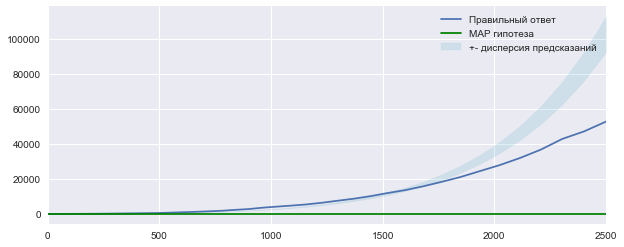

In [41]:
plot_predictions(x_new[:,1].ravel(), mu, samples)

In [42]:
start = pd.to_datetime('2020-03-03')
may = pd.to_datetime('2020-05-01')
june = pd.to_datetime('2020-06-01')
september = pd.to_datetime('2020-09-01')

predictions = [int(value) for value in np.exp(model_sigm.predict(np.array([[(may - start).days, (may - start).days**2], 
                                                                      [(june - start).days, (june - start).days**2],
                                                                      [(september - start).days, (september - start).days**2]])))]

print(f'1 мая в России модель предсказывает {predictions[0]} случаев')
print(f'1 июня в России модель предсказывает {predictions[1]} случаев')
print(f'1 сентября в России модель предсказывает {predictions[2]} случаев')

1 мая в России модель предсказывает 126964 случаев
1 июня в России модель предсказывает 321384 случаев
1 сентября в России модель предсказывает 0 случаев
